In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv

--2020-01-14 10:58:19--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.92.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.92.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687088084 (655M) [text/csv]
Saving to: ‘yellow_tripdata_2019-01.csv’

yellow_tripdata_201 100%[===================>] 655.26M  16.5MB/s    in 41s     

2020-01-14 10:59:00 (16.0 MB/s) - ‘yellow_tripdata_2019-01.csv’ saved [687088084/687088084]



In [3]:
data = pd.read_csv('/content/yellow_tripdata_2019-01.csv')
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [6]:
data.shape

(7667792, 18)

In [7]:
data.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

In [0]:
data = data.drop(['congestion_surcharge'], axis=1)

In [0]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 994.5+ MB


In [11]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55


In [12]:
data['payment_type'].value_counts()

1    5486027
2    2137415
3      33186
4      11164
Name: payment_type, dtype: int64

A numeric code signifying how the passenger paid for the trip.  

  - 1= Credit card
  - 2= Cash
  - 3= No charge
  - 4= Dispute
  - 5= Unknown
  - 6= Voided trip

In [13]:
data['VendorID'].value_counts()

2    4652191
1    2938778
4      76823
Name: VendorID, dtype: int64

A code indicating the TPEP provider that provided the record

- 1= Creative Mobile Technologies, LLC; 
- 2= VeriFone Inc.

In [14]:
data['passenger_count'].value_counts()

1    5456121
2    1114106
5     323842
3     314721
6     200811
4     140753
0     117381
8         29
7         19
9          9
Name: passenger_count, dtype: int64

#Handling and Investigating Outliers
  - There are lot of outliers in the trip distance and fare amount column. 
  - Carrying out further investigation to know why we have outliers.

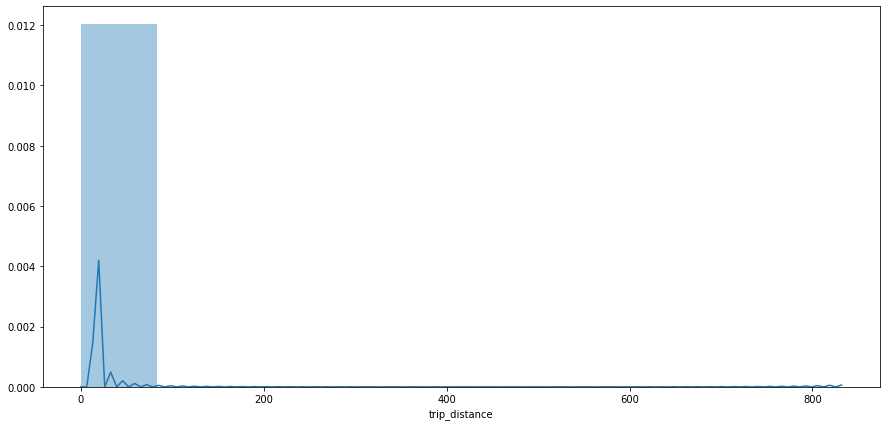

In [15]:
plt.figure(figsize=(15,7))
sns.distplot(data['trip_distance'], bins=10)

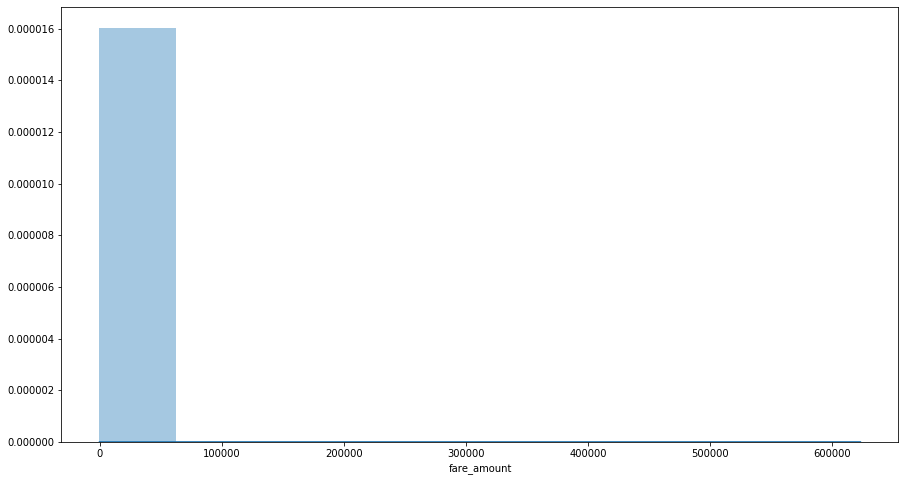

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(data['fare_amount'], bins=10)

- The outliers prevented us from getting any meaningful information from the histogram above.
- In the trip distance distribution, most of the distance are clustered between 0 and 100 distance.
- While from the fare amount distribution we can see the values are clustered between 0 and less than 100,000.

- Check the max values of each column.

In [17]:
print('Max fare amount is ',data['fare_amount'].max())
print('Max trip distance is ',data['trip_distance'].max())

Max fare amount is  623259.86
Max trip distance is  831.8


- The maximum fare amount is 623259.86. This is suspiciously large and can taken as a mstake or meter test.
- The max trip distance is 831.8 miles.
- Honestly, this figures are very large.

- Is there a positive correlation between trip taken and fare amount?

In [18]:
correlation = data['trip_distance'].corr(data['fare_amount'])
print('The correlation between trip distance and fare amount is {}'.format(correlation))

The correlation between trip distance and fare amount is 0.03803544718519049


We see a correlation of 0.03. This shows that they are likely independent of each other.

- Using a scatterplot to visualize the correlation between the 2 columns.

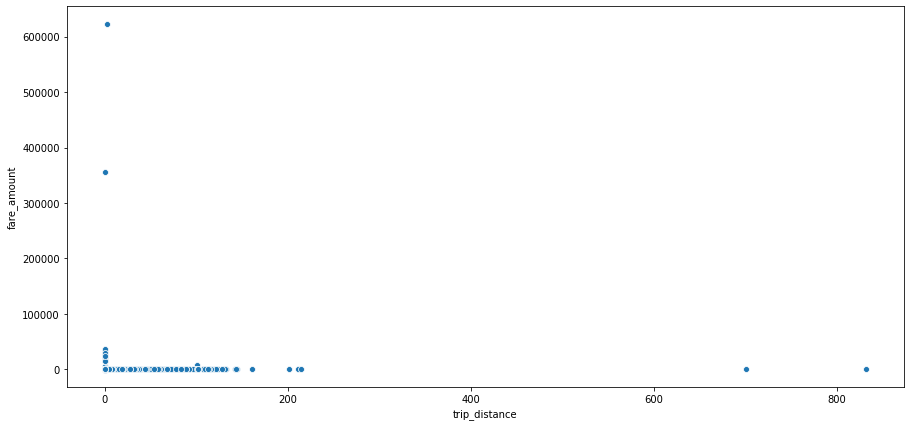

In [19]:
plt.figure(figsize=(15,7))

sns.scatterplot(data['trip_distance'], data['fare_amount'])

- The scatterplot shows a cluster at the lower left region. No visible correlation at this point.
- But we can see a visible correlation from the outliers. As the trip dstance increases, fare amount also increases. But it is just for 2 data points.

- Boxplot of the two columns.

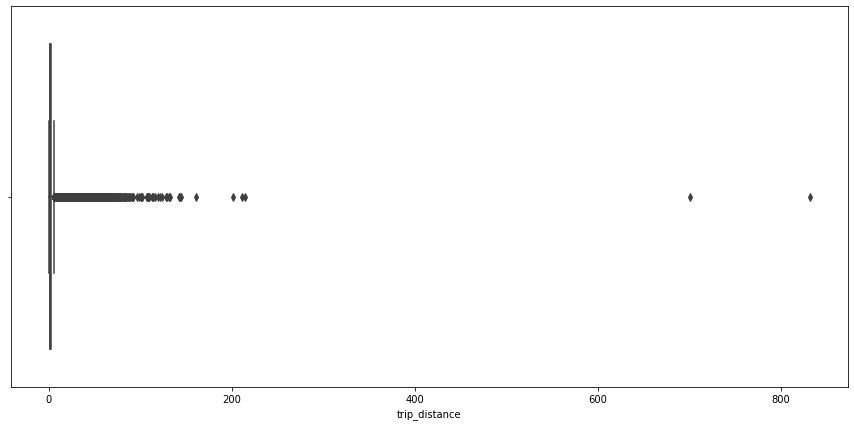

In [20]:
plt.figure(figsize=(15,7))

sns.boxplot(data['trip_distance'])

- Outliers starting from trip distance above 200 miles.

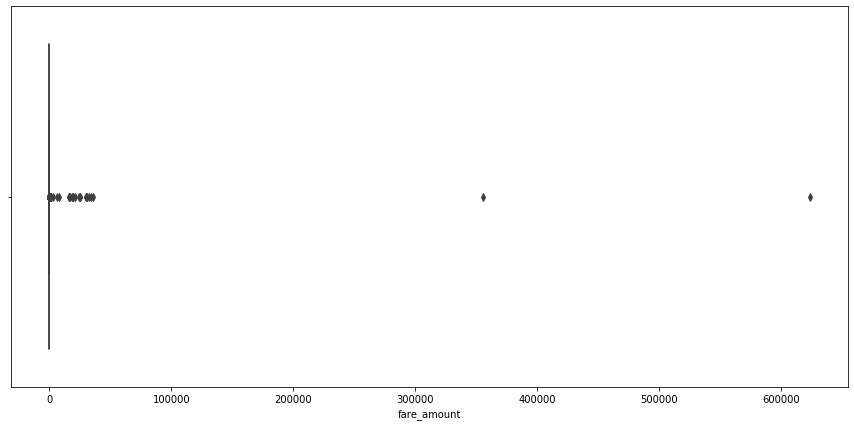

In [21]:
plt.figure(figsize=(15,7))

sns.boxplot(data['fare_amount'])

- Outliers from fare amount above 100000

In [22]:
trip_outlier = data[data['trip_distance'] > 200 ]
trip_outlier

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
4286612,1,2019-01-18 16:32:24,2019-01-18 16:39:20,1,700.70,1,N,236,262,1,6.0,1.0,0.5,1.20,0.00,0.3,9.00
4707513,2,2019-01-20 12:22:24,2019-01-20 17:05:36,2,211.36,5,N,132,265,2,50.0,0.0,0.5,0.00,5.76,0.3,56.56
4881766,2,2019-01-21 10:13:05,2019-01-21 13:28:01,1,201.27,5,N,208,265,1,150.0,0.0,0.5,0.00,1.66,0.3,152.46
6074021,1,2019-01-25 21:56:39,2019-01-25 22:06:08,1,831.80,1,N,140,239,1,8.5,0.5,0.5,1.96,0.00,0.3,11.76
6770897,2,2019-01-28 17:24:11,2019-01-29 04:37:16,5,214.01,1,N,265,265,2,760.0,1.0,0.5,0.00,0.00,0.3,761.80


- Just 3 data points have a trip distance above 200 miles.
- These figures are accurate becauese the trip distance and fare amount are positively correlated

In [23]:
trip_correlation = trip_outlier['trip_distance'].corr(trip_outlier['fare_amount'])
print('The correlation between trip distance and fare amount for the trip outlier is {}'.format(trip_correlation))

The correlation between trip distance and fare amount for the trip outlier is -0.5194700535940027


In [24]:
fare_outlier = data[data['fare_amount'] > 5000 ]
fare_outlier

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
233844,1,2019-01-02 10:06:08,2019-01-02 10:06:08,0,0.0,99,N,264,264,1,18477.08,0.00,0.00,0.0,0.0,0.0,18477.08
233845,1,2019-01-02 10:06:56,2019-01-02 10:06:56,0,0.0,99,N,264,264,1,17242.81,0.00,0.00,0.0,0.0,0.0,17242.81
301097,1,2019-01-02 16:06:14,2019-01-02 16:06:14,0,0.0,99,N,264,264,1,25356.38,0.00,0.00,0.0,0.0,0.0,25356.38
478791,1,2019-01-03 13:08:33,2019-01-03 13:08:53,1,0.1,6,N,264,264,2,6666.65,0.00,0.50,0.0,0.0,0.3,6667.45
651591,1,2019-01-04 09:28:37,2019-01-04 09:28:37,0,0.0,99,N,264,264,1,31107.91,0.00,0.00,0.0,0.0,0.0,31107.91
737289,1,2019-01-04 16:08:10,2019-01-04 16:08:10,0,0.0,99,N,264,264,1,30130.71,0.00,0.00,0.0,0.0,0.0,30130.71
1368512,1,2019-01-07 12:21:04,2019-01-07 12:21:04,0,0.0,99,N,264,264,1,19863.26,0.00,0.00,0.0,0.0,0.0,19863.26
1368513,1,2019-01-07 12:21:45,2019-01-07 12:21:45,0,0.0,99,N,264,264,1,19194.52,0.00,0.00,0.0,0.0,0.0,19194.52
1419626,1,2019-01-07 16:13:40,2019-01-07 16:13:40,0,0.0,99,N,264,264,1,25628.96,0.00,0.00,0.0,0.0,0.0,25628.96
1649397,1,2019-01-08 16:09:44,2019-01-08 16:09:44,0,0.0,99,N,264,264,1,33023.53,0.00,0.00,0.0,0.0,0.0,33023.53


- 20 data points with fare amount greater than 5000 dollars.

PULocationID TLC Taxi Zone in which the taximeter was engaged

DOLocationID TLC Taxi Zone in which the taximeter was disengaged

- Strangely we can see that for these fare amounts, majority had 0 trip distance and PU and DO location shows the trip started and stopped in the same zone. This can be as a result of meter test or meter repairs. 

- Drop Outliers
- Dropping the outliers to see if the histogram will tell a different story.
- Drop fare amount greater than 5000.
- Drop trip distance greater than 200.

In [0]:
data.drop(data[data['fare_amount'] > 5000].index, axis=0, inplace=True)
data.drop(data[data['trip_distance'] > 200].index, axis=0, inplace=True)

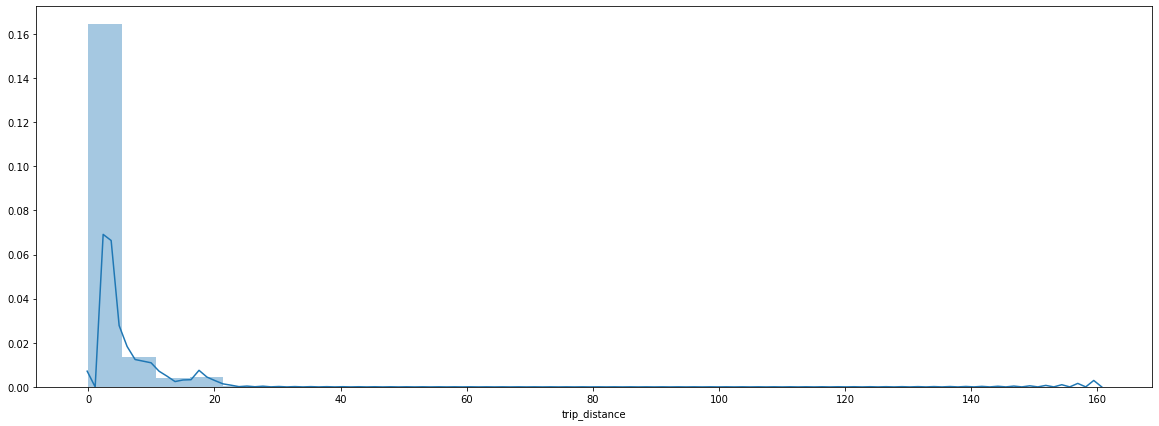

In [26]:
plt.figure(figsize=(20,7))
sns.distplot(data['trip_distance'], bins=30)

- Trip distance is skewed to the right.
- Trip distance is mostly clustered between 0 and 20 miles.
- Higher frequency of trip at the 0 bar (0-5) range.

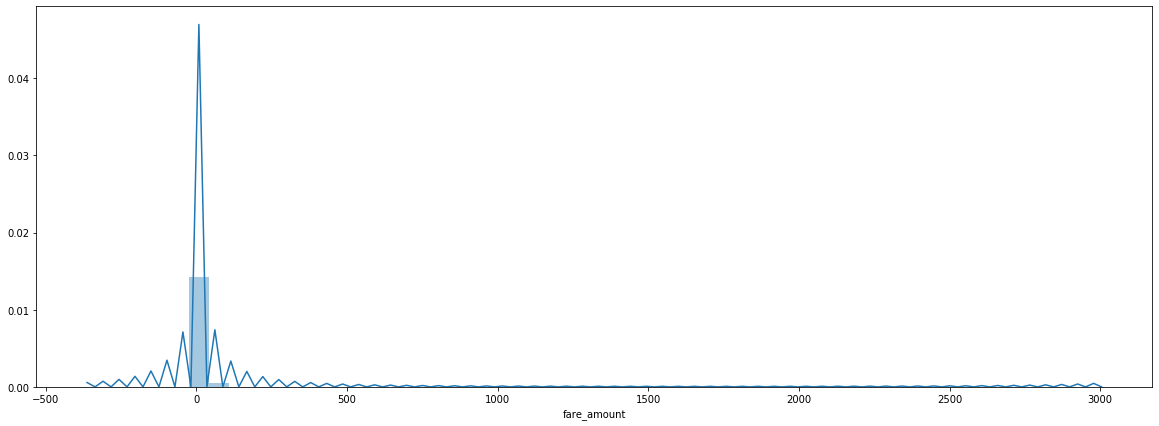

In [27]:
plt.figure(figsize=(20,7))
sns.distplot(data['fare_amount'])

- We have fare amounts with negative values. 
- But why?

In [28]:
zero_fare = data[data['fare_amount'] < 0 ]
zero_fare

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
663,2,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,N,148,148,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,N,170,238,4,-19.0,-0.5,-0.5,0.0,0.0,-0.3,-20.3
2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,N,162,234,4,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-9.8
2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,N,234,234,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,N,234,234,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665612,2,2019-01-31 23:24:31,2019-01-31 23:25:52,1,0.34,1,N,161,237,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
7666343,2,2019-01-31 23:36:37,2019-01-31 23:37:44,1,0.17,1,N,68,158,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
7666452,2,2019-01-31 23:08:30,2019-01-31 23:19:27,2,0.58,1,N,162,229,3,-8.0,-0.5,-0.5,0.0,0.0,-0.3,-9.3
7666601,2,2019-01-31 23:42:48,2019-01-31 23:48:23,1,0.68,1,N,211,211,4,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-6.8


In [29]:
zero_fare['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

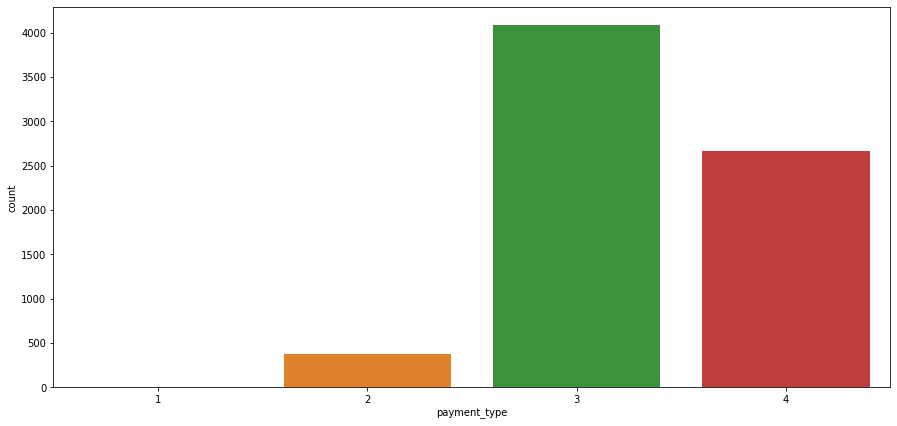

In [30]:
plt.figure(figsize=(15,7))

sns.countplot(zero_fare['payment_type'])

Decription of payment type.

A numeric code signifying how the passenger paid for the trip.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

- 57% of the paid with no charge. I will assume this means the trip was free and drivers paid for the tax and toll fees. Maybe some sought of discount.
- 29% of riders in paid with dispute. Still no payment here. 
- 1 person paid credit card.
- 5% paid with cash.

- Which passenger tip the most? highest dstance or high fare amount
- Does a higher fare amount mean higher trip covered?
- Does a higher passenger count mean high fare amount
- General Geographic coverage of trips
- Geoghraphic coverage based on passenger count

In [31]:
data['tip_amount'].max()

787.25

In [48]:
tip_fare = data[(data['tip_amount'] > 0) & (data['trip_distance'] == 0)]
len(tip_fare)

19012

- There are about 19012 instances where trip distance of 0 miles receive a tip.
- Further investigation shows that the PU and DO location ID are in the same zone. This means the taximeter was engaged and disengaged in the same zone.

- Loooking at the passenger counts.

In [66]:
data['passenger_count'].value_counts()

1    5456114
2    1114105
5     323841
3     314721
6     200811
4     140753
0     117365
8         29
7         19
9          9
Name: passenger_count, dtype: int64

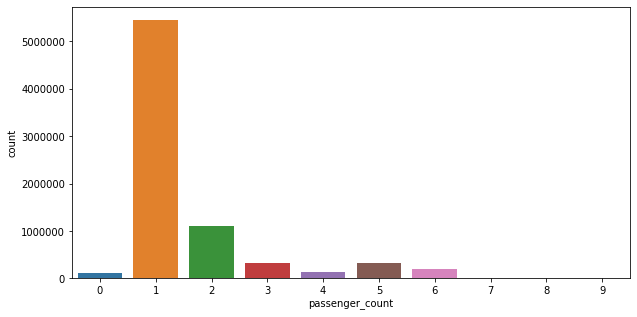

In [53]:
plt.figure(figsize=(10, 5))

sns.countplot(data['passenger_count'])

- Most trip in the newyork yellow taxi had just a single passenger. ~70% of the trips in january 2019.
- Trips with 2 passenger counts was the second with over 1 million trips.

- Trips with more passenger where less(7, 8, 9) this is understandable. I don't even know if a taxi can take this much people unless a limousine. Or maybe a combined calculation by the driver.

- This figure above shows us we have instances where passenger counts was 0. Wondering what the distance coverage was and if there was a fare amount and tip.

- Further Investigation into the passenger counts with 0 passengers

In [67]:
pcount = data[data['passenger_count'] == 0]
pcount.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
156,1,2019-01-01 00:32:24,2019-01-01 00:33:21,0,5.3,1,N,50,50,1,2.5,0.5,0.5,0.75,0.0,0.3,4.55
228,1,2019-01-01 00:00:50,2019-01-01 00:31:48,0,18.0,2,N,132,140,1,52.0,0.0,0.5,7.00,0.0,0.3,59.80
229,1,2019-01-01 00:38:32,2019-01-01 01:09:51,0,8.9,1,N,229,37,1,29.5,0.5,0.5,7.70,0.0,0.3,38.50
298,1,2019-01-01 00:45:19,2019-01-01 00:55:53,0,1.0,1,N,107,170,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
905,1,2019-01-01 00:20:15,2019-01-01 00:26:42,0,0.7,1,N,90,249,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30


- What payment type was used?

In [71]:
pcount.shape

(117365, 17)

In [74]:
pcount['payment_type'].value_counts()

1    83221
2    31873
3     1574
4      697
Name: payment_type, dtype: int64

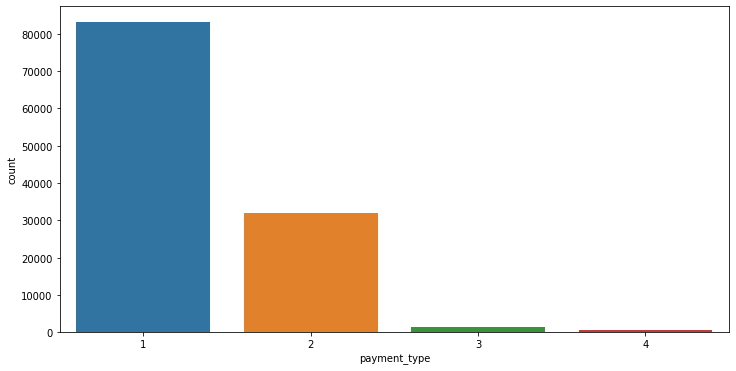

In [68]:
plt.figure(figsize=(12, 6))

sns.countplot(pcount['payment_type'])

- Majority of the ride are paid with credit cards ~ 80k used credit card.
- ~ 30k paid in cash


What's the payment rate of each ride.

- I will use the rate code Id to determine this.

The final rate code in effect at the end of the trip.
- 1= Standard rate
- 2=JFK
- 3=Newark
- 4=Nassau or Westchester
- 5=Negotiated fare
- 6=Group ride

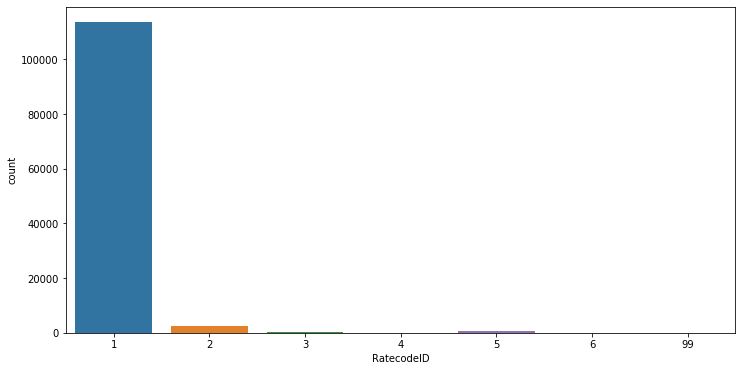

In [70]:
plt.figure(figsize=(12, 6))

sns.countplot(pcount['RatecodeID'])

- Majority of the ride was paid in the standard rate. Over 100k of the rides paid with standard rates. This is over 90%.


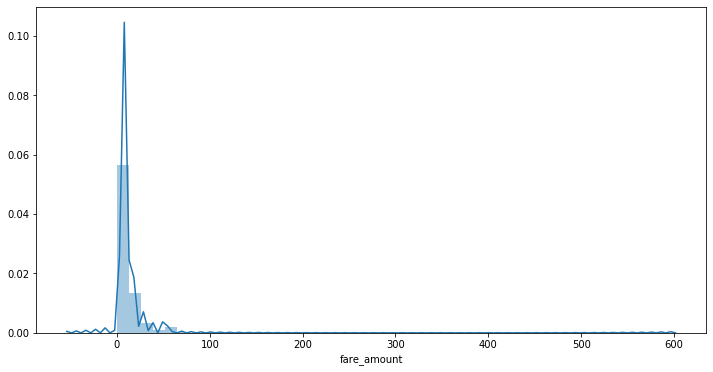

In [73]:
plt.figure(figsize=(12, 6))

sns.distplot(pcount['fare_amount'])

- Fare amount is similar to the general fare amount.
- We have negative fare amounts here. These are the no charge and dispute trip payment type.

Conclusion from this is this zero passenger trips might have been an errand of sought. Maybe a delivery or company package delivery.

- Check the correlation between passenger trips and fare amount. Are they dependent on each other?

In [75]:
data['passenger_count'].corr(data['fare_amount'])

0.003960345525138803

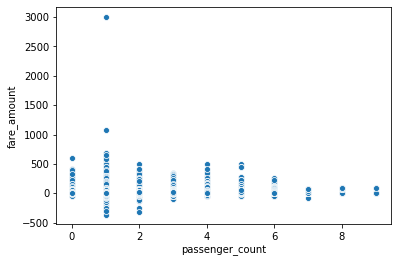

In [76]:
sns.scatterplot(data['passenger_count'], data['fare_amount'])

In [59]:
!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv


--2020-01-14 12:03:39--  https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.128.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.128.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [application/octet-stream]
Saving to: ‘taxi+_zone_lookup.csv’

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0s      

2020-01-14 12:03:39 (229 MB/s) - ‘taxi+_zone_lookup.csv’ saved [12322/12322]



In [61]:
taxi_zone = pd.read_csv('/content/taxi+_zone_lookup.csv')
taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [0]:
borough = [z for z in taxi_zone['Zone'].values]

In [12]:
arr = []
number_of_numb = int(input())


for i in range(number_of_numb):
    numbers = int(input())
    arr.append(numbers)
rev = arr[::-1]

print(arr)
print(rev)

[]
[4, 3, 2, 1]


In [10]:
arr = []
number_of_numb = int(input())
def reverse_array(arr):
  for i in range(number_of_numb):
    numbers = int(input())
    arr.append(numbers)
    rev = arr[::-1]

    
if __name__ == '__main__':
    arr = list(map(int, input().rstrip().split()))
reverse_array(arr)

4
1
2
3
4
5
